In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf

AAPL = yf.download("AAPL", start="2023-01-01", end="2023-08-01", interval='1d')


[*********************100%%**********************]  1 of 1 completed


In [3]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069321,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597061,70790800
...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


In [16]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(AAPL, SmaCross, cash=1000, commission=0, exclusive_orders=True)

output = bt.run()
output

Start                     2023-01-03 00:00:00
End                       2023-07-31 00:00:00
Duration                    209 days 00:00:00
Exposure Time [%]                   72.916667
Equity Final [$]                  1231.419952
Equity Peak [$]                   1231.419952
Return [%]                          23.141995
Buy & Hold Return [%]               57.072038
Return (Ann.) [%]                    43.94972
Volatility (Ann.) [%]               21.860003
Sharpe Ratio                         2.010508
Sortino Ratio                        5.471433
Calmar Ratio                         8.675767
Max. Drawdown [%]                   -5.065802
Avg. Drawdown [%]                   -1.621834
Max. Drawdown Duration       20 days 00:00:00
Avg. Drawdown Duration        8 days 00:00:00
# Trades                                    2
Win Rate [%]                             50.0
Best Trade [%]                      28.851205
Worst Trade [%]                      -3.63005
Avg. Trade [%]                    

In [10]:
GOOG

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900
...,...,...,...,...,...
2013-02-25,802.30,808.41,790.49,790.77,2303900
2013-02-26,795.00,795.95,784.40,790.13,2202500
2013-02-27,794.80,804.75,791.11,799.78,2026100
2013-02-28,801.10,806.99,801.03,801.20,2265800


In [19]:
output._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,-6,39,50,146.830002,152.160004,-31.980011,-0.036300,2023-03-01,2023-03-16,15 days
1,6,50,143,152.160004,196.059998,263.399963,0.288512,2023-03-16,2023-07-31,137 days


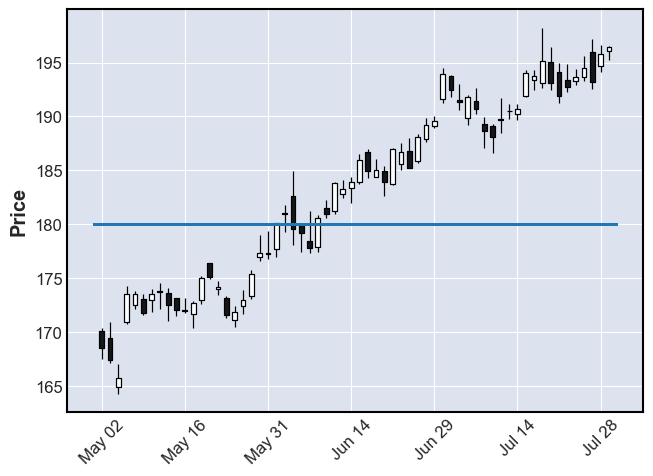

In [39]:
mfpData = AAPL[AAPL.index > '2023-05-01']
mpf.plot(mfpData, type='candle', hlines=[180])